In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import h3pandas


In [3]:
# Download and subset data
df = pd.read_csv('./temp.csv')
df = df.rename({'pickup_longitude': 'lng', 'pickup_latitude': 'lat'}, axis=1)[
    ['lng', 'lat', 'passenger_count']]


In [4]:
qt = 0.1
df = df.loc[(df['lng'] > df['lng'].quantile(qt)) & (df['lng'] < df['lng'].quantile(1-qt))
            & (df['lat'] > df['lat'].quantile(qt)) & (df['lat'] < df['lat'].quantile(1-qt))]


In [5]:
# use geo_to_h3 to add an index with H3 addresses resolution 10
dfh3 = df.h3.geo_to_h3(10)
dfh3.head()

,lng,lat,passenger_count
h3_10,,,
8a2a100d2c87fff,-73.993896,40.750111,1
8a2a100d2a07fff,-73.976425,40.739811,1
8a2a100d630ffff,-73.968704,40.754246,5
8a2a100d629ffff,-73.976601,40.751896,1
8a2a100d2557fff,-73.994957,40.745079,1


<AxesSubplot:xlabel='lng', ylabel='lat'>

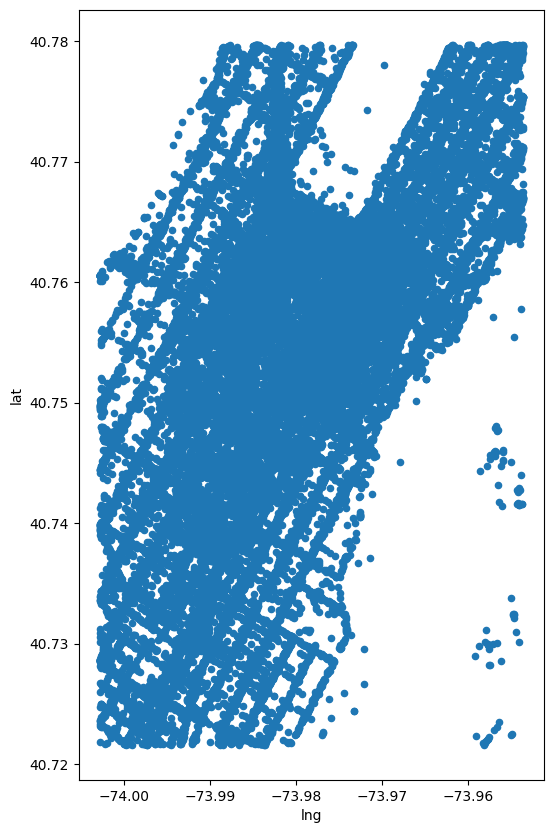

In [6]:
df.plot.scatter(x = 'lng', y = 'lat', figsize = (6, 10))

In [7]:
# 计算每个六边形有多少个点
dfh3 = dfh3.drop(columns=['lng', 'lat']).groupby('h3_10').sum()
gdfh3 = dfh3.h3.h3_to_geo_boundary()
gdfh3.head()


,passenger_count,geometry
h3_10,,
8a2a10089007fff,17,"POLYGON ((-73.95877 40.78037, -73.95969 40.780..."
8a2a1008900ffff,110,"POLYGON ((-73.95843 40.77924, -73.95934 40.779..."
8a2a10089017fff,9,"POLYGON ((-73.96032 40.78070, -73.96123 40.780..."
8a2a1008901ffff,97,"POLYGON ((-73.95997 40.77958, -73.96088 40.779..."
8a2a1008902ffff,117,"POLYGON ((-73.95723 40.78003, -73.95814 40.779..."


<AxesSubplot:>

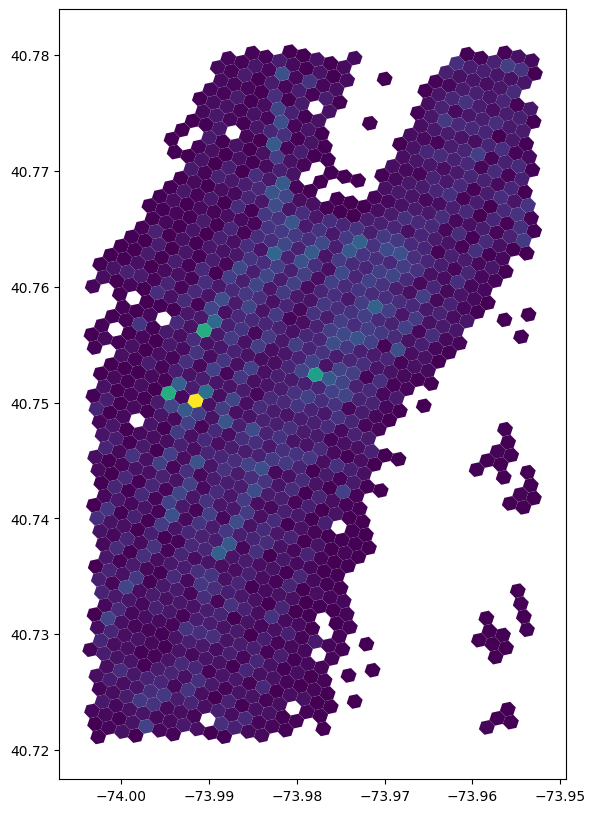

In [8]:
gdfh3.plot(column = 'passenger_count', figsize = (10, 10))

In [10]:
gdfh3_9 = gdfh3.h3.h3_to_parent(9)
gdfh3_9.head()


,passenger_count,geometry,h3_09
h3_10,,,
8a2a10089007fff,17,"POLYGON ((-73.95877 40.78037, -73.95969 40.780...",892a1008903ffff
8a2a1008900ffff,110,"POLYGON ((-73.95843 40.77924, -73.95934 40.779...",892a1008903ffff
8a2a10089017fff,9,"POLYGON ((-73.96032 40.78070, -73.96123 40.780...",892a1008903ffff
8a2a1008901ffff,97,"POLYGON ((-73.95997 40.77958, -73.96088 40.779...",892a1008903ffff
8a2a1008902ffff,117,"POLYGON ((-73.95723 40.78003, -73.95814 40.779...",892a1008903ffff


In [11]:
gdfh3_9 = gdfh3_9.set_index('h3_09').groupby(
    'h3_09').sum().h3.h3_to_geo_boundary()
gdfh3_9.head()


,passenger_count,geometry
h3_09,,
892a1008903ffff,350,"POLYGON ((-73.95912 40.78149, -73.96123 40.780..."
892a1008907ffff,611,"POLYGON ((-73.95688 40.77891, -73.95899 40.777..."
892a100890bffff,286,"POLYGON ((-73.96340 40.78138, -73.96551 40.780..."
892a100890fffff,686,"POLYGON ((-73.96116 40.77879, -73.96327 40.777..."
892a1008917ffff,544,"POLYGON ((-73.95485 40.78160, -73.95695 40.780..."


<AxesSubplot:>

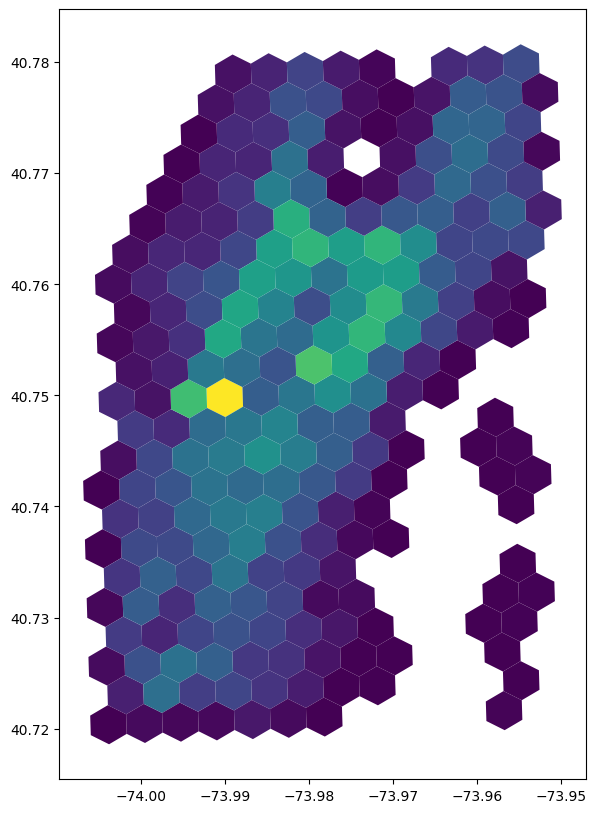

In [12]:
gdfh3_9.plot(column='passenger_count', figsize=(10, 10))
